## Monte Carlo Simulation for pi

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats 

def plot_density(samples, hbins=30, sample_range=[0,1]):
    hbins = 30
    counts, bin_edges = np.histogram(samples, bins=hbins, range=sample_range)
    bin_width = bin_edges[1] - bin_edges[0]
    density = (counts / len(samples)) / bin_width
    plt.bar(bin_edges[:-1] + bin_width/2, density, width=bin_width*.8);
    return plt.gca(), bin_edges  # ax

In [2]:
N = 100_000  # num of samples
X = np.random.uniform(-1, 1, size=(N,2))
d = np.sum(X**2, axis=1)
d = (d <= 1).astype(float)

pi4hat = d.mean()
std = d.std()
se  = d.std() / np.sqrt(N)
e = pi4hat - np.pi/4

print(f"pi/4_hat= {pi4hat}")
print(f"pi_hat  = {pi4hat*4}")
print(f"std=    {std}")
print(f"se =    {se}")
print(f"|pi_hat - pi/4|={e}")


pi/4_hat= 0.78573
pi_hat  = 3.14292
std=    0.41031496085324504
se =    0.0012975298343390798
|pi_hat - pi/4|=0.0003318366025517605


In [3]:
def mcpi(N=100_000):  # N: num of samples
    X = np.random.uniform(-1, 1, size=(N,2))
    d = np.sum(X**2, axis=1)
    d = (d <= 1).sum()
    return d / N 

Nrepeat = 10000
s = np.array([mcpi() for _ in range(Nrepeat)]);

### Repeated simulation
- Just repeat mcpi() many times
- histogram shows the density of mcpi

0.785396527 0.7853981633974483 -1.6363974483235566e-06


NameError: name 's0' is not defined

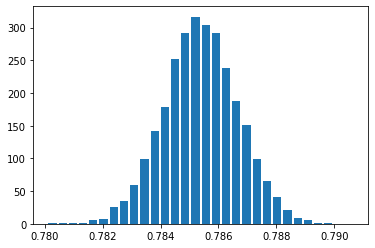

In [4]:
plot_density(s, sample_range=[s.min(), s.max()]);
print(s.mean(), np.pi/4, s.mean() - np.pi/4)
print(s0.std(), ": the std of mcpi(N)")

### SE vs N

In [ ]:
def mcpi(N):
    X = np.random.uniform(-1, 1, size=N)
    Y = np.random.uniform(-1, 1, size=N)
    d = X**2 + Y**2
    d = d <= 1
    pihat = d.sum() / N
    se = d.std() / np.sqrt(N)  # standard error = the std of the pihat; approximation of sigma_pihat
    return pihat, se, re, ss
# -----------------

a = range(2, 9, 1); print('a:', list(a))
Ns = np.power(10, a); print('N:', Ns)

pihats, ses, res, sstds = [], [], [], []
for N in Ns:
    p, s, r, ss = mcpi(N) 
    pihats.append(p)
    ses.append(s)

In [ ]:
pihats = np.array(pihats)
ses = np.array(ses)

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].plot(Ns, ses, '-o')
axes[0].set(yscale='log', xscale='log', aspect='equal')
axes[1].plot(ses, '-o')
axes[1].grid(True);
print(ses[4:])

In [ ]:
# slop = dy / dx
dy = np.log(ses[-1]) - np.log(ses[0])
dx = np.log(Ns[-1]) - np.log(Ns[0])
slope = dy/dx
print(f"slope= {slope}  -> should be close to -1/2 (1/sqrt(N))")

End.